<h1 style="color:#fffff;font-size:70px;font-family:Roboto;text-align:center;"><strong>Diabetes Prediction Assignment</strong></h1>



## Table of Content

### 1. [Introduction](#1)

1.1 [Data Retrieving](#1.1) 

1.2 [Data information](#1.2)

1.3 [About the Dataset](#1.3)

<br>

### 2. [Exploratory Data Analysis](#2)

2.1 [Statistic of the Dataset](#2.1)

2.2 [Domain knowledge](#2.2)

2.3 [Dataframe properties](#2.3)

2.4 [Outlier Exploration](#2.4)

2.5 [Correlation](#2.5)

<br>

### 3. [Data Cleaning and Feature Engineering](#3)

<br>

### 4. [Building Model](#4)

4.1 [Data Splitting](#4.1)

4.2 [LGBM](#4.2)

4.3 [Logistic Regression](#4.3)

4.4 [Decision Tree](#4.4)

4.5 [Gradient Boosting ](#4.5)

4.6 [Random Forest](#4.6)
<br>

### 5. [Ultimate model judgement](#5)

<br>

### 6. [References](#6)

<br>



<a id="1"></a>
# 1. Introduction
****
Electronic Health Records (EHRs) are the primary source of data for the Diabetes Prediction dataset. EHRs are digital versions of patient health records that contain information about their medical history, diagnosis, treatment, and outcomes. The data in EHRs is collected and stored by healthcare providers, such as hospitals and clinics, as part of their routine clinical practice.[1]

To create the Diabetes Prediction dataset, EHRs were collected from multiple healthcare providers and aggregated into a single dataset. The data was then cleaned and preprocessed to ensure consistency and remove any irrelevant or incomplete information.[1]

The use of EHRs as a data source for the Diabetes Prediction dataset has several advantages. First, EHRs contain a large amount of patient data, including demographic and clinical information, which can be used to develop accurate machine learning models. Second, EHRs provide a longitudinal view of a patient's health over time, which can be used to identify patterns and trends in their health status. Finally, EHRs are widely used in clinical practice, making the Diabetes Prediction dataset relevant to real-world healthcare settings.[1]

## Importing libraries and datasets
****

In [1]:
# import libraries, datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,20

#Ploting module

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #
# scatter matrix library
from pandas.plotting import scatter_matrix


<a id="1.1"></a>
## 1.1  Data Retrieving
In order to ensure the from the csv file is in good shape, we have to eliminate the extra white space. After finishing verifying the datatypes, the ingested data is cleaned by the following steps: </p>
    * <b>Extra-whitespace </b> </p> 
    * <b>Missing Values </b> </p>
    * <b>Identifying Categorical Data </b> </p>


In [2]:
# import data
#Skipinitialspace parameter is use to skip initial space present in the dataframe. 
df = pd.read_csv("diabetes_prediction_dataset.csv", delimiter=',', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<a id="1.2"></a>
## 1.2 Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


<a id="1.3"></a>
## 1.3 About the datasets
For this data set : the dataset have 9 columns and 100000 rows. 
<p>As can be observed , the major data type are</p>
<ul><li>int64 : hypertension, heart_disease, blood_glucose_level, diabetes</li>
    <li>float64 : age, bmi, HbA1c_level</li>
    <li> object : gender, smoking__history </li>
</ul>
<p>The collection methodology for the diabetes prediction dataset involves gathering medical and demographic data from patients who have been diagnosed with or are at risk of developing diabetes. The data is typically collected through surveys, medical records, and laboratory tests. The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The data is then processed and cleaned to remove any errors or inconsistencies. The dataset can also be used for research purposes to identify potential risk factors for diabetes and to develop effective prevention and treatment strategies.</p>[1]

<a id="2"></a>
# 2. Exploratory Data Analysis
***

<a id="2.1"></a>
## 2.1 Statistics of the datasets

In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
#Showing all of the important statistic of the datasets.
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Data Distribution

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

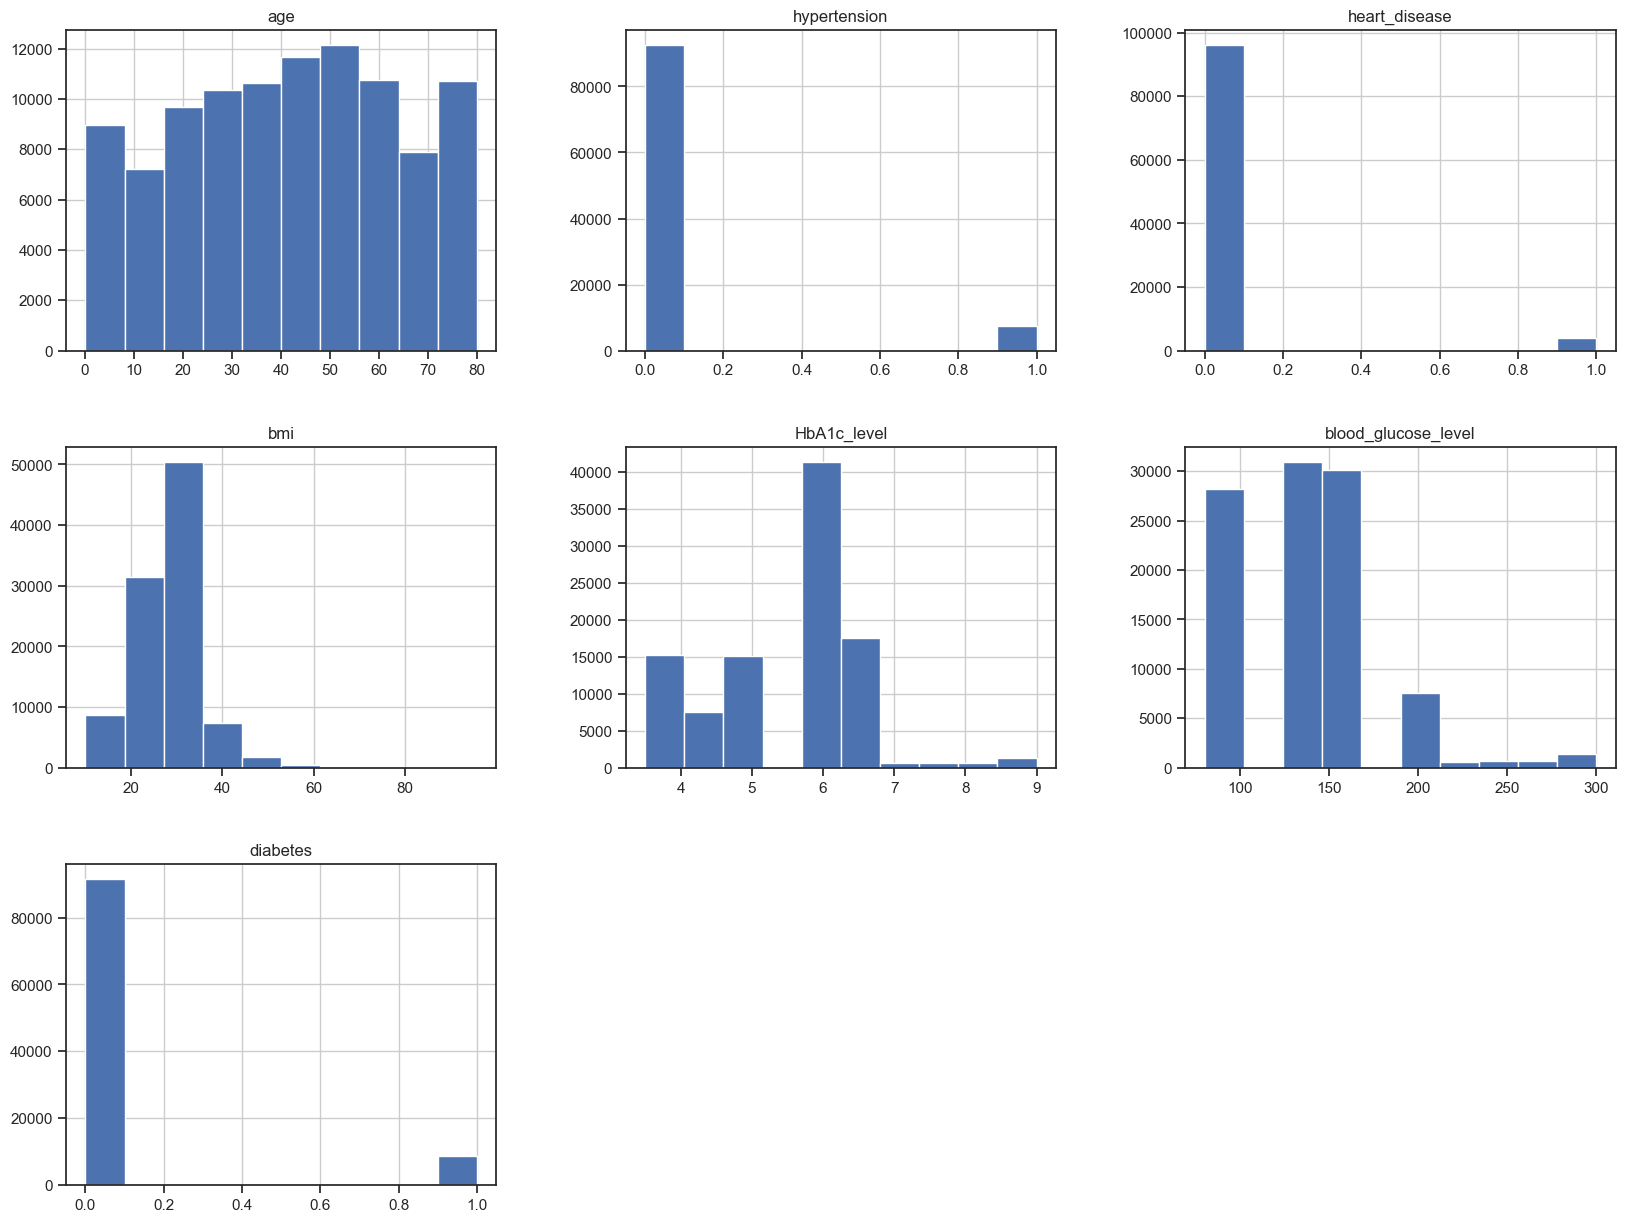

In [6]:
plt.rcParams['figure.figsize'] = [20, 15]
df.hist()
plt

From the observation, we can classified the skewness of each column are :
 <ul>
 <li>Left skew :  `blood_glucose_level`, `bmi` </li>
 <li>Normal distribution value are `age` , `HbA1c_level`</li>
 </ul>

<a id="2.2"></a>
## 2.2  Domain Knowledge

In order to process to the next step, the domain knowledge must be acquired :

* `gender`: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other. [1]

* `age`: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset. [1]

* `hypertension`: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension. [1]

* `heart_disease`: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.[1]

* `smoking_history`: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.[1]

* `bmi`: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55 [1]
 [4]
<ul>
<li>Underweight: Body mass index is less than 18.5 kg/m^2</li>
<li> Normal: 18.5 to 24.9 kg/m^2</li>
<li> Overweight: 25.0 to 29.9 kg/m^2</li>
<li> Obese: 30.0 kg/m^2 or higher</li>
</ul>

* `HbA1c_level`: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.[1]

* `blood_glucose_level`: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.[1]

* `diabetes`: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.[1]

<a id="2.3"></a>
## 2.3 Dataframe properties

#### Object Columns

In [7]:
obj_col = list(df.select_dtypes(['object']).columns)
obj_col

['gender', 'smoking_history']

#### Check NaN variable

In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Check null variable

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<a id="2.4"></a>
## 2.4 Outlier Exploration

In [10]:
def plot_box(df):
    df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
    plt.show()

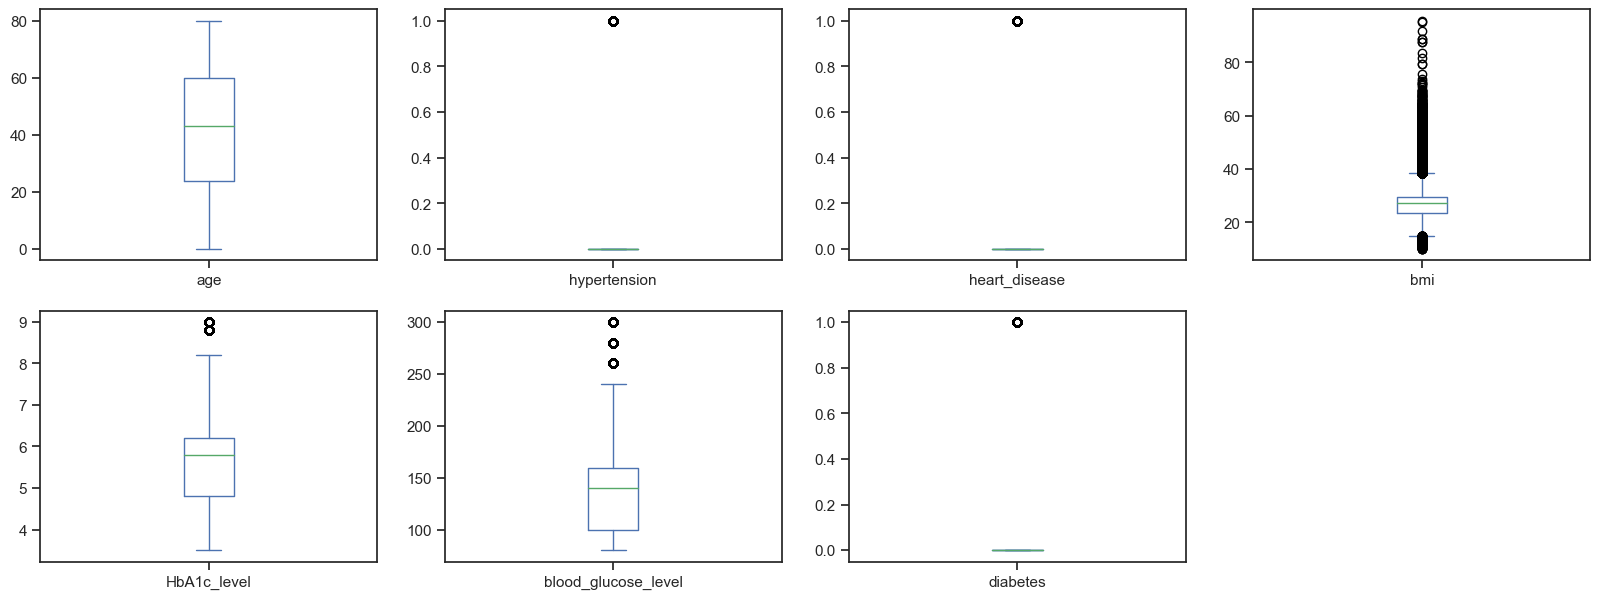

In [11]:
plot_box(df)

As can be observe from the box plot, the column that contains outliers are as follow:
* `bmi`
* `HbA1c_level`
* `blood_glucose_level`

<a id="2.5"></a>
## 2.5 Correlation 

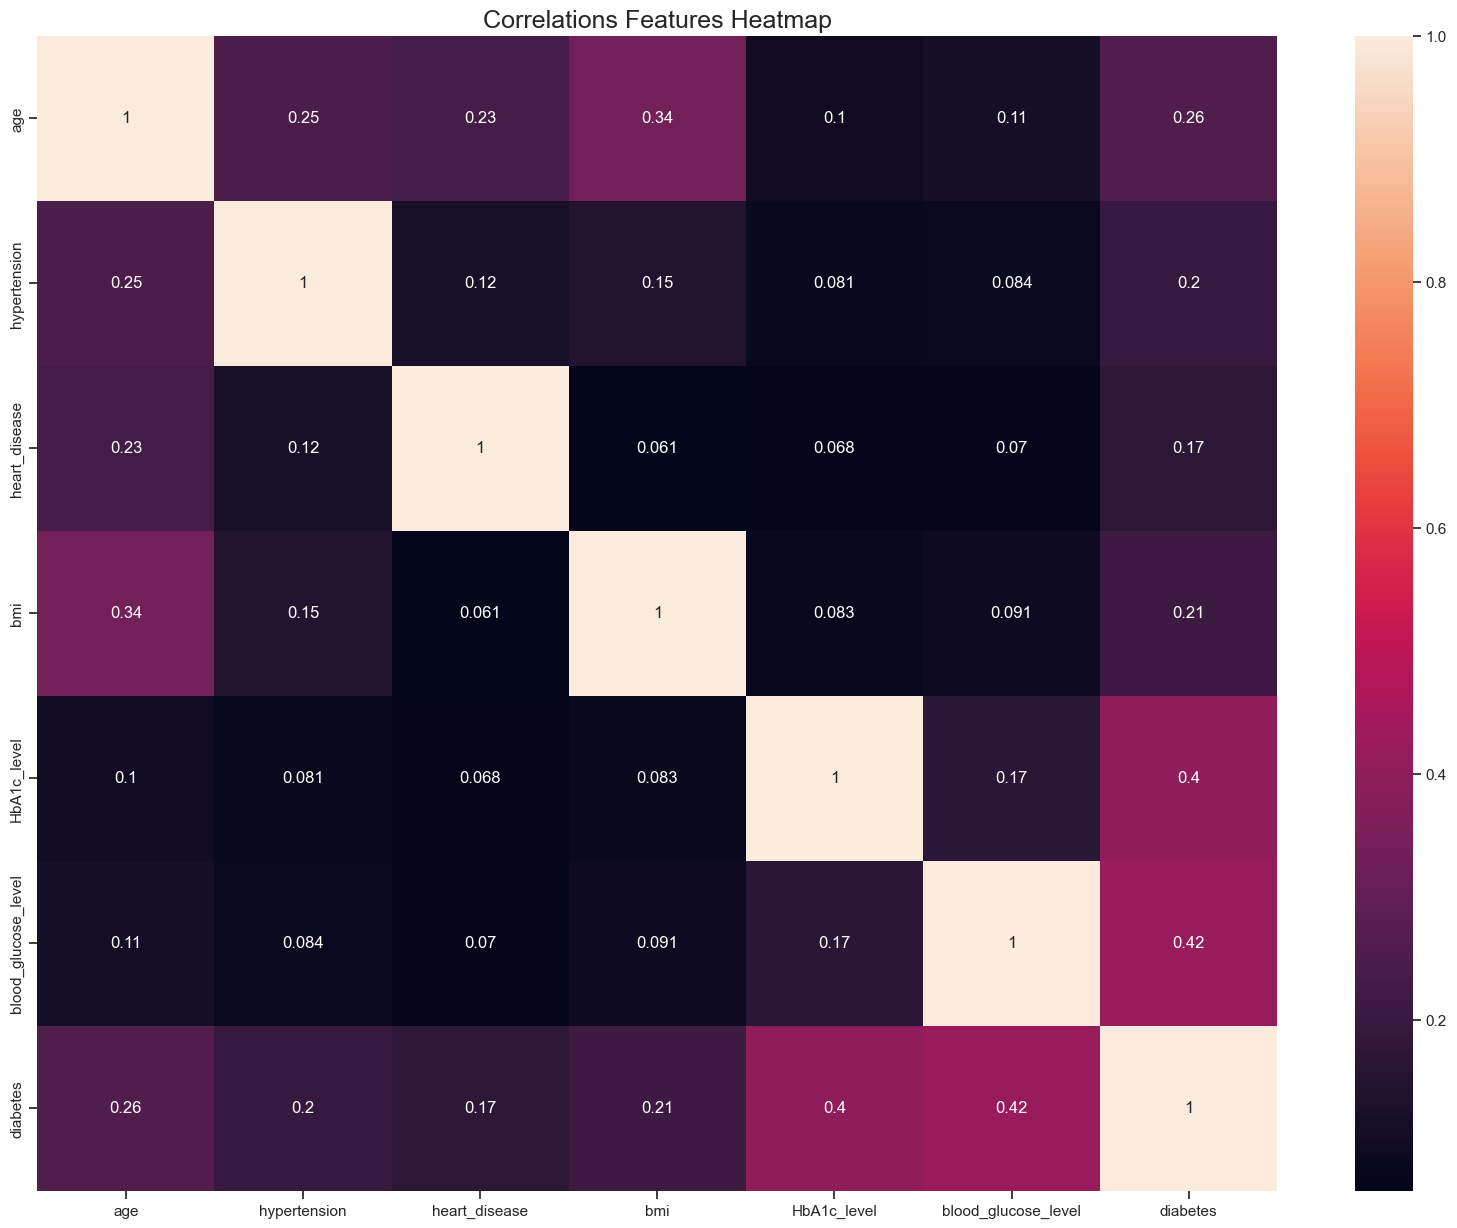

In [12]:
corr = df.drop(columns=obj_col,axis=1).corr()
sns.heatmap(data=corr, annot = True)
plt.title("Correlations Features Heatmap", fontsize=18)
plt.show()

<a id ="3"></a>
# 3. Data Cleaning and Feature Engineering

### LabelEncoding

By converting categorical variables into numerical labels, we can include them in the scaling process along with other numerical features, making the data consistent and suitable for certain algorithms.

In [13]:
obj_col

['gender', 'smoking_history']

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[obj_col] = df[obj_col].apply(le.fit_transform)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


### Drop Outlier

Outliers can distort statistical measures and analysis results. They can have a significant impact on statistical parameters like the mean and standard deviation, leading to misleading interpretations and incorrect conclusions. By removing outliers, we can improve the overall quality and accuracy of the data.

In [15]:
def drop_outlier(df,column):
    # Calculate the quartiles and IQR
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Set a threshold for outlier detection (e.g., 1.5)
    threshold = 1.5

    # Determine the lower and upper bounds
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Drop rows with values outside the lower and upper bounds
    df = df[(column >= lower_bound) & (column <= upper_bound)]
    return df

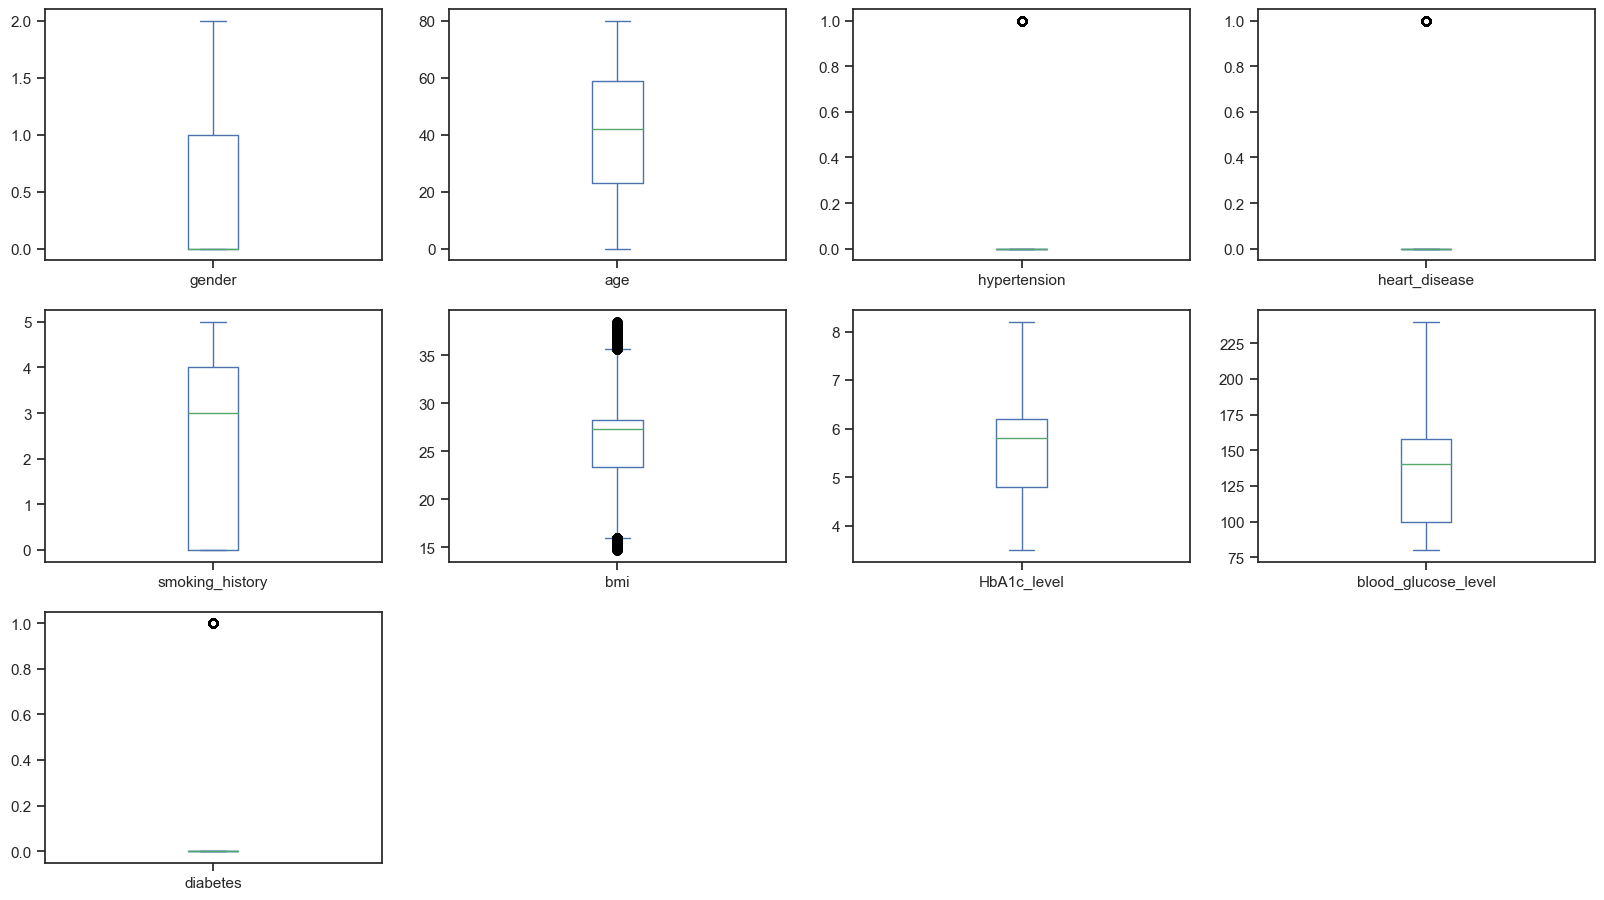

In [16]:
df= drop_outlier(df,df['bmi'])
df= drop_outlier(df,df['HbA1c_level'])
df= drop_outlier(df,df['blood_glucose_level'])
df.reset_index(drop=True,inplace=True)
plot_box(df)

### Normalization

Normalizing data helps in achieving stability and consistent behavior in models. Scaling the data within a specific range prevents the models from being overly sensitive to small changes in the input variables. 

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
data_minmax= scaler.transform(df)

In [18]:
df[df.columns] = pd.DataFrame(data_minmax, columns = df.columns)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0.0,1.0,0.8,0.440521,0.659574,0.37500,0.0
1,0.0,0.674675,0.0,0.0,0.0,0.530055,0.659574,0.00000,0.0
2,0.5,0.349349,0.0,0.0,0.8,0.530055,0.468085,0.48750,0.0
3,0.0,0.449449,0.0,0.0,0.2,0.367381,0.319149,0.46875,0.0
4,0.5,0.949950,1.0,1.0,0.2,0.228247,0.276596,0.46875,0.0
...,...,...,...,...,...,...,...,...,...
90382,0.0,1.000000,0.0,0.0,0.0,0.530055,0.574468,0.06250,0.0
90383,0.0,0.024024,0.0,0.0,0.0,0.111812,0.638298,0.12500,0.0
90384,0.5,0.824825,0.0,0.0,0.6,0.551492,0.468085,0.46875,0.0
90385,0.0,0.299299,0.0,0.0,0.8,0.870534,0.106383,0.12500,0.0


<a id ="4"></a>
# 4 Building model

This is a classification problem therefore the algorithm of choice are follow: 
*  LGBM
*  Logistic Regression
*  Decision Tree
*  Gradient Boosting
*  Random Forest

<a id ="4.1"></a>
## 4.1 Data Splitting

In [19]:
#Feature selection
x = df.drop(['diabetes'], axis=1)
# Label
y = df['diabetes']

In [20]:
# !conda install scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize the KFold object
kf = KFold(n_splits=5)

# Loop over each fold
for train_index, test_index in kf.split(x):
    # Get the training and testing data for this fold
    x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

Using a 5-fold cross-validation is a common choice in machine learning because it strikes a good balance between model performance estimation and computational efficiency

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(72310, 8)
(72310,)
(18077, 8)
(18077,)


#### Undersampling

 Large imbalanced datasets can be computationally expensive to process and train models on. Undersampling the majority class reduces the overall dataset size, which can significantly reduce training time and computational resource requirements. It allows for faster model training, making it more feasible to experiment with different algorithms, hyperparameters, and feature engineering techniques.

In [22]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversample = RandomOverSampler(sampling_strategy={0: 68706, 1: 3604})
undersample = RandomUnderSampler(sampling_strategy={0: 14000, 1:3604})
x_over, y_over = oversample.fit_resample(x_train, y_train)
x_over, y_over = undersample.fit_resample(x_over, y_over)

In [26]:
import matplotlib.pyplot as plt
from collections import Counter 

def label_dis(label):
    label = label
    label_unique = list(set(label))
    counts = Counter(label)

    fig = plt.figure(figsize = (10, 5)) 
    plt.bar(label_unique, counts.values(), color ='red', width = 0.4)
    plt.xlabel("Diabetes Status")
    plt.ylabel("Number of patient")
    plt.title("Distribution Bar Chart")
    for index, value in enumerate(counts.keys()):
        plt.text(index, counts[value], counts[value])
    plt.show()

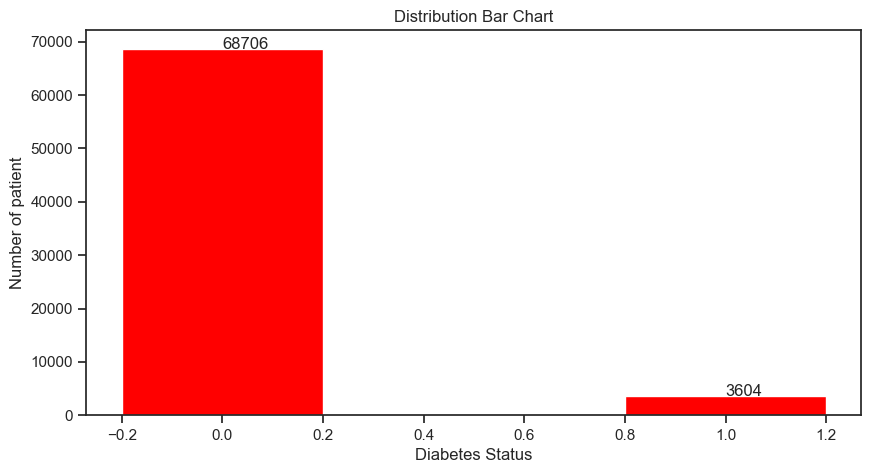

In [27]:
label_dis(y_train)

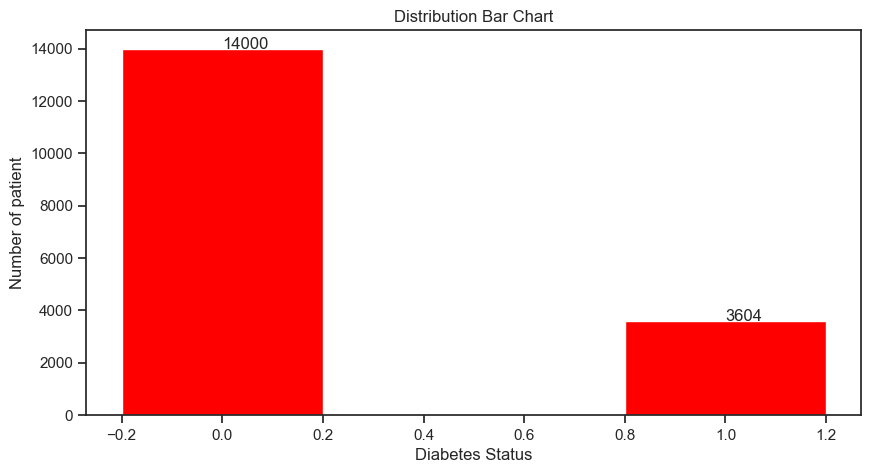

In [28]:
label_dis(y_over)

In [26]:
print(x_over.shape)
print(y_over.shape)
print(x_test.shape)
print(y_test.shape)

(17604, 8)
(17604,)
(18077, 8)
(18077,)


Create an empty array to contains model performance

In [27]:
res_arr = []

In [28]:
class model_perf :
    def __init__(self, classification_report, name, f1_score_inp, accuracy , precision,recall ):
        self.classification_report = classification_report
        self.name = name
        self.f1 = f1_score_inp
        self.accu = accuracy
        self.precision = precision
        self.recall = recall
    

### Ultilties Function

In [29]:
# This is a ultilities function for plotting confusion matrix
def plot_confusion(test, input_pred):
    df_cm = pd.DataFrame(confusion_matrix(test, input_pred), range(2), range(2))
    sns.set(font_scale=1.4)  # for label size
    sns.heatmap(df_cm, annot=True, cmap='PuRd')  # font size
    plt.title('Confusion Matrix')
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    return df_cm

<a id ="4.2"></a>
## 4.2 LGBM

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100) 

In [31]:
##Parameter for grid tunning

# Create the param list
param_list = {'learning_rate': [0.1, 0.05, 0.01],
              'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, -1],
              'num_leaves': [31, 50, 100]}

In [32]:
lgbm_Grid = GridSearchCV(estimator = lgbm, param_grid
                       = param_list)

In [33]:
lgbm_Grid.fit(x_over, y_over)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, -1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 50, 100]})

In [34]:
# Determine the best parameters
print(lgbm_Grid.best_params_)
print(lgbm_Grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 31}
0.915019574113759


In [35]:
best_lgbm = lgbm_Grid.best_estimator_

### Model Evaluation

### Validate with validation dataset 

In [36]:
best_lgbm_pred = best_lgbm.predict(x_test)

In [37]:
print(classification_report(y_test,best_lgbm_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     17186
         1.0       0.51      0.71      0.59       891

    accuracy                           0.95     18077
   macro avg       0.75      0.84      0.78     18077
weighted avg       0.96      0.95      0.96     18077



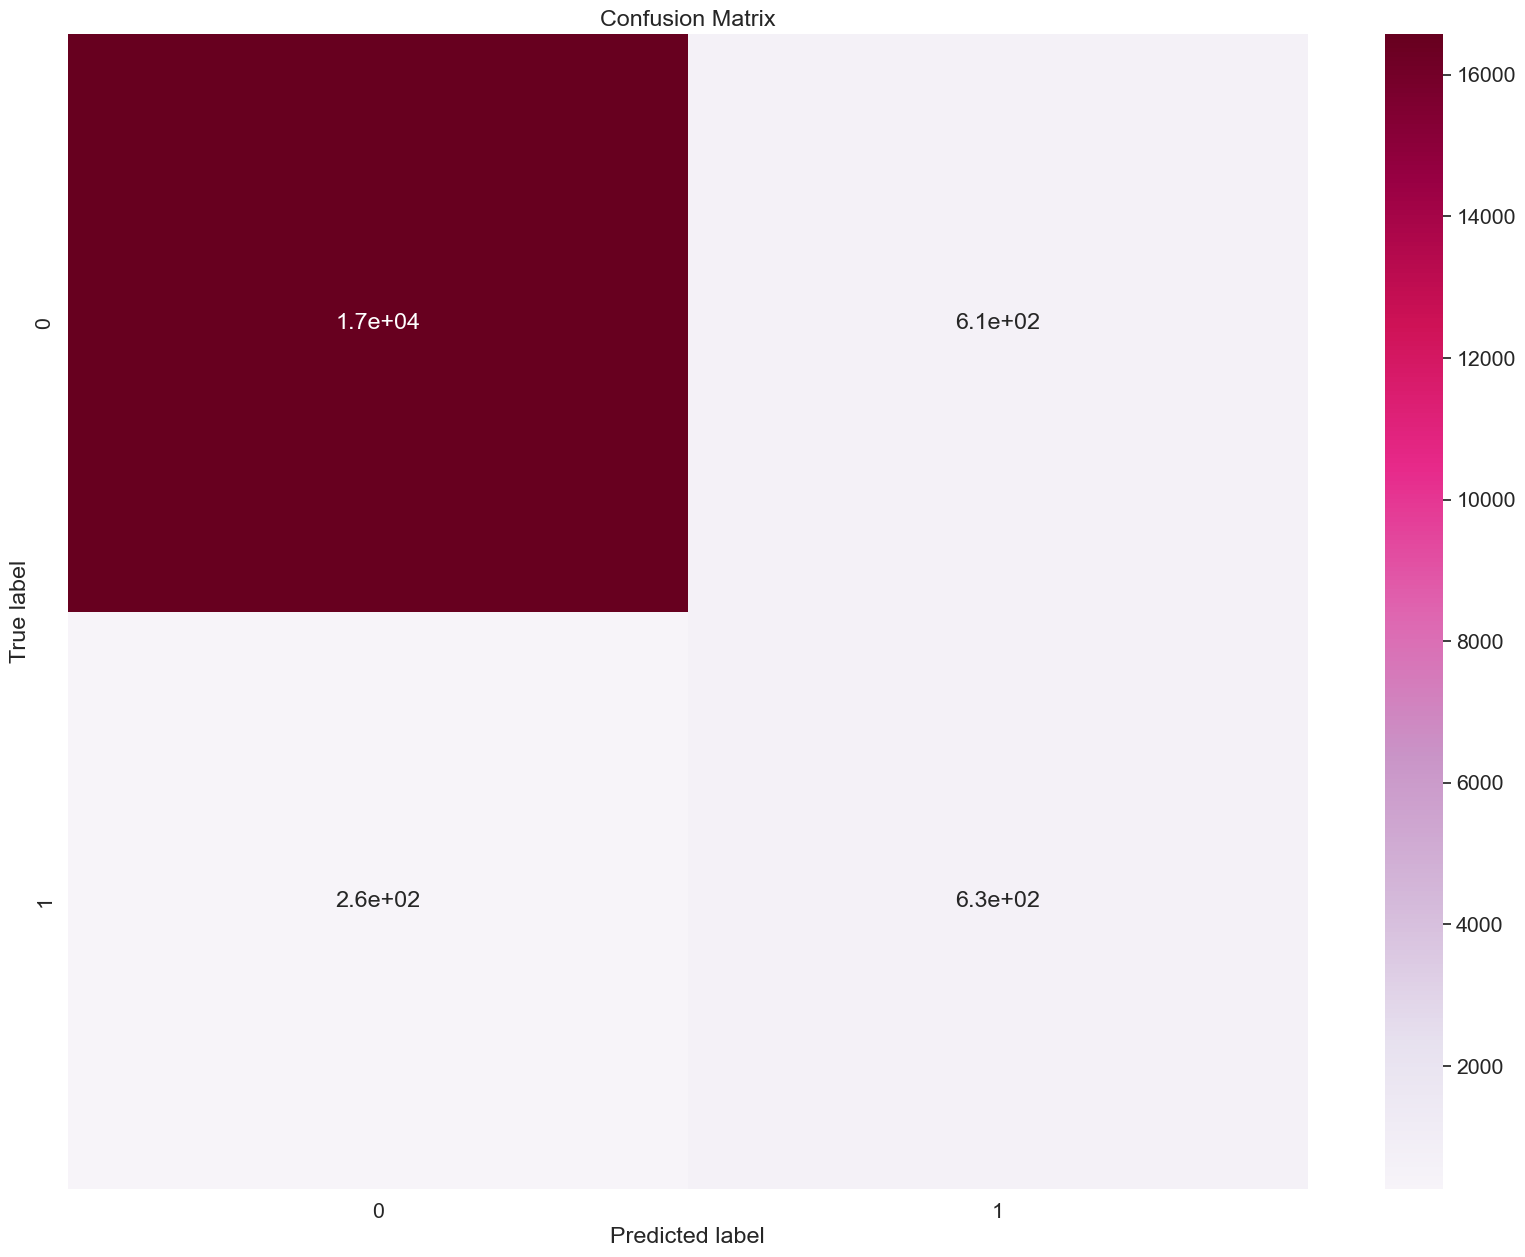

In [38]:
df_cm_best_lgbm = plot_confusion(y_test, best_lgbm_pred)

In [114]:
# Add the final result to the array list
accu = accuracy_score(y_test,best_lgbm_pred)
precis = precision_score(y_test, best_lgbm_pred)
recall = recall_score(y_test, best_lgbm_pred)
f1_score_best_lgbm = f1_score(y_test, best_lgbm_pred)
res_arr.append(model_perf(classification_report(y_test, best_lgbm_pred), "LGBM",f1_score_best_lgbm, accu, precis,recall))

<a id ="4.3"></a>
## 4.3 Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

# define model
model = LogisticRegression(random_state=42)
# define evaluation
#We have learn that for 2 fold yield the best result
# define parameter grid
parameters_list= {
    'penalty': ['l1', 'l2', 'None'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

# define search
search =GridSearchCV(model, parameters_list)
# execute search
result = search.fit(x_over, y_over)
# summarize result
pred = search.predict(x_test)
print(classification_report(y_test, pred))
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     17186
         1.0       0.42      0.65      0.51       891

    accuracy                           0.94     18077
   macro avg       0.70      0.80      0.74     18077
weighted avg       0.95      0.94      0.94     18077

Best Score: 0.8896276077302421
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Val

In [41]:
log_model_5 = search.best_estimator_

### Model Evaluation

### Validate with validation dataset 

In [42]:
pred_log_model_5 = log_model_5.predict(x_test)


In [43]:
print(classification_report(y_test, pred_log_model_5))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     17186
         1.0       0.42      0.65      0.51       891

    accuracy                           0.94     18077
   macro avg       0.70      0.80      0.74     18077
weighted avg       0.95      0.94      0.94     18077



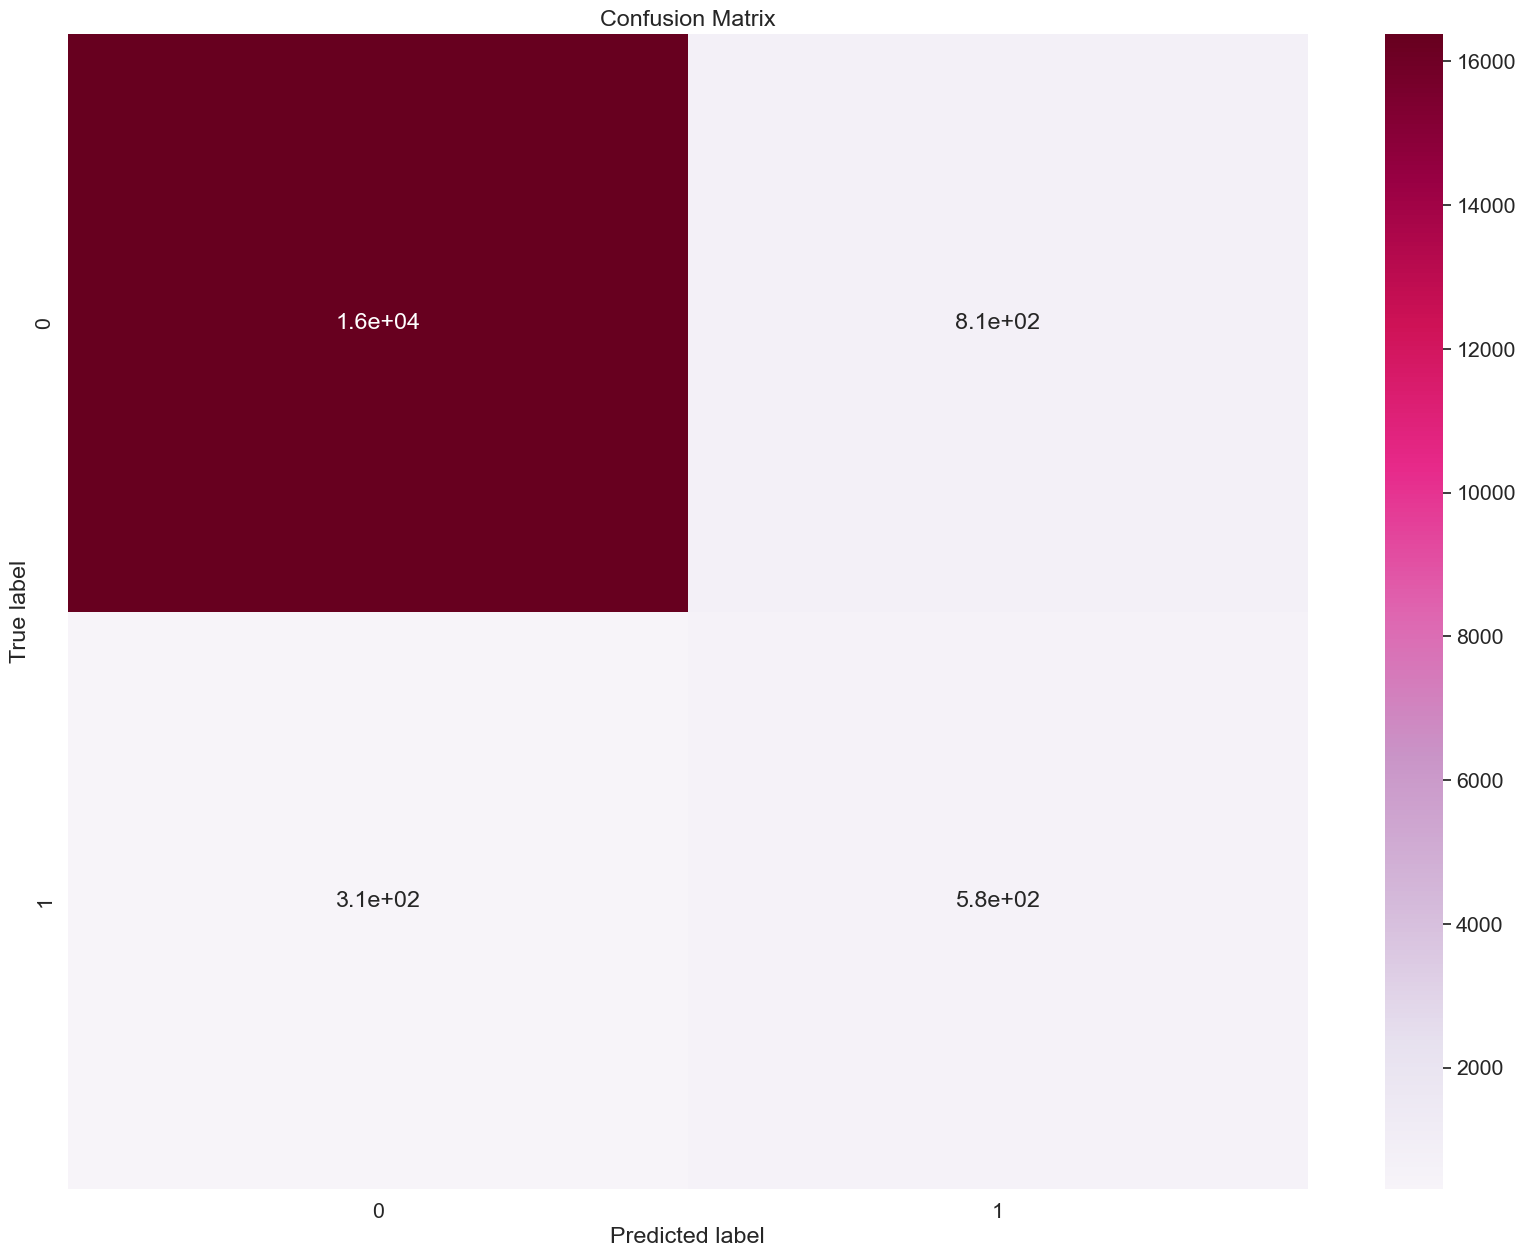

In [44]:
df_cm_model_5 = plot_confusion(y_test, pred_log_model_5)

In [115]:
f1_model_5 = f1_score(y_test, pred_log_model_5)
accu = accuracy_score(y_test, pred_log_model_5)
precis = precision_score(y_test, pred_log_model_5)
recall = recall_score(y_test, pred_log_model_5)
res_arr.append(model_perf(classification_report(y_test, pred_log_model_5), "Logistic Regression",f1_model_5, accu, precis,recall))

<a id ="4.4"></a>
## 4.4 Decision Tree 

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree = tree.DecisionTreeClassifier(random_state=42)
dtree.fit(x_over, y_over)

DecisionTreeClassifier(random_state=42)

In [47]:
# Create the parameter grid 
params_distribution= {
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 50, 100],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [ 2, 5, 10],
              'max_features': [None, 'sqrt', 'log2']}

In [48]:
dt = DecisionTreeClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid = params_distribution)

#Execute search
grid_search.fit(x_over, y_over)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9055328741834707


Score of after finetuning different Parmeters

In [49]:
df_score = pd.DataFrame(grid_search.cv_results_)
df_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024760,0.000773,0.003022,0.000653,gini,None,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.885260,0.887532,0.886112,0.893496,0.892898,0.889060,0.003460,214
1,0.027012,0.001840,0.002800,0.000748,gini,None,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.886964,0.884692,0.885828,0.888952,0.898580,0.889003,0.004991,217
2,0.024432,0.001113,0.002377,0.000539,gini,None,None,2,10,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.892928,0.890940,0.879296,0.890656,0.899716,0.890707,0.006578,196
3,0.023604,0.001846,0.002805,0.000391,gini,None,None,5,2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.892076,0.891792,0.882420,0.891508,0.905682,0.892696,0.007441,141
4,0.026951,0.001927,0.002160,0.000432,gini,None,None,5,5,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.892076,0.891792,0.882420,0.891508,0.905682,0.892696,0.007441,141


In [50]:
best_dtree = grid_search.best_estimator_

### Model Evaluation

### Validate with validation dataset 

In [51]:
print(classification_report(y_test, best_dtree.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     17186
         1.0       0.50      0.69      0.58       891

    accuracy                           0.95     18077
   macro avg       0.74      0.83      0.78     18077
weighted avg       0.96      0.95      0.95     18077



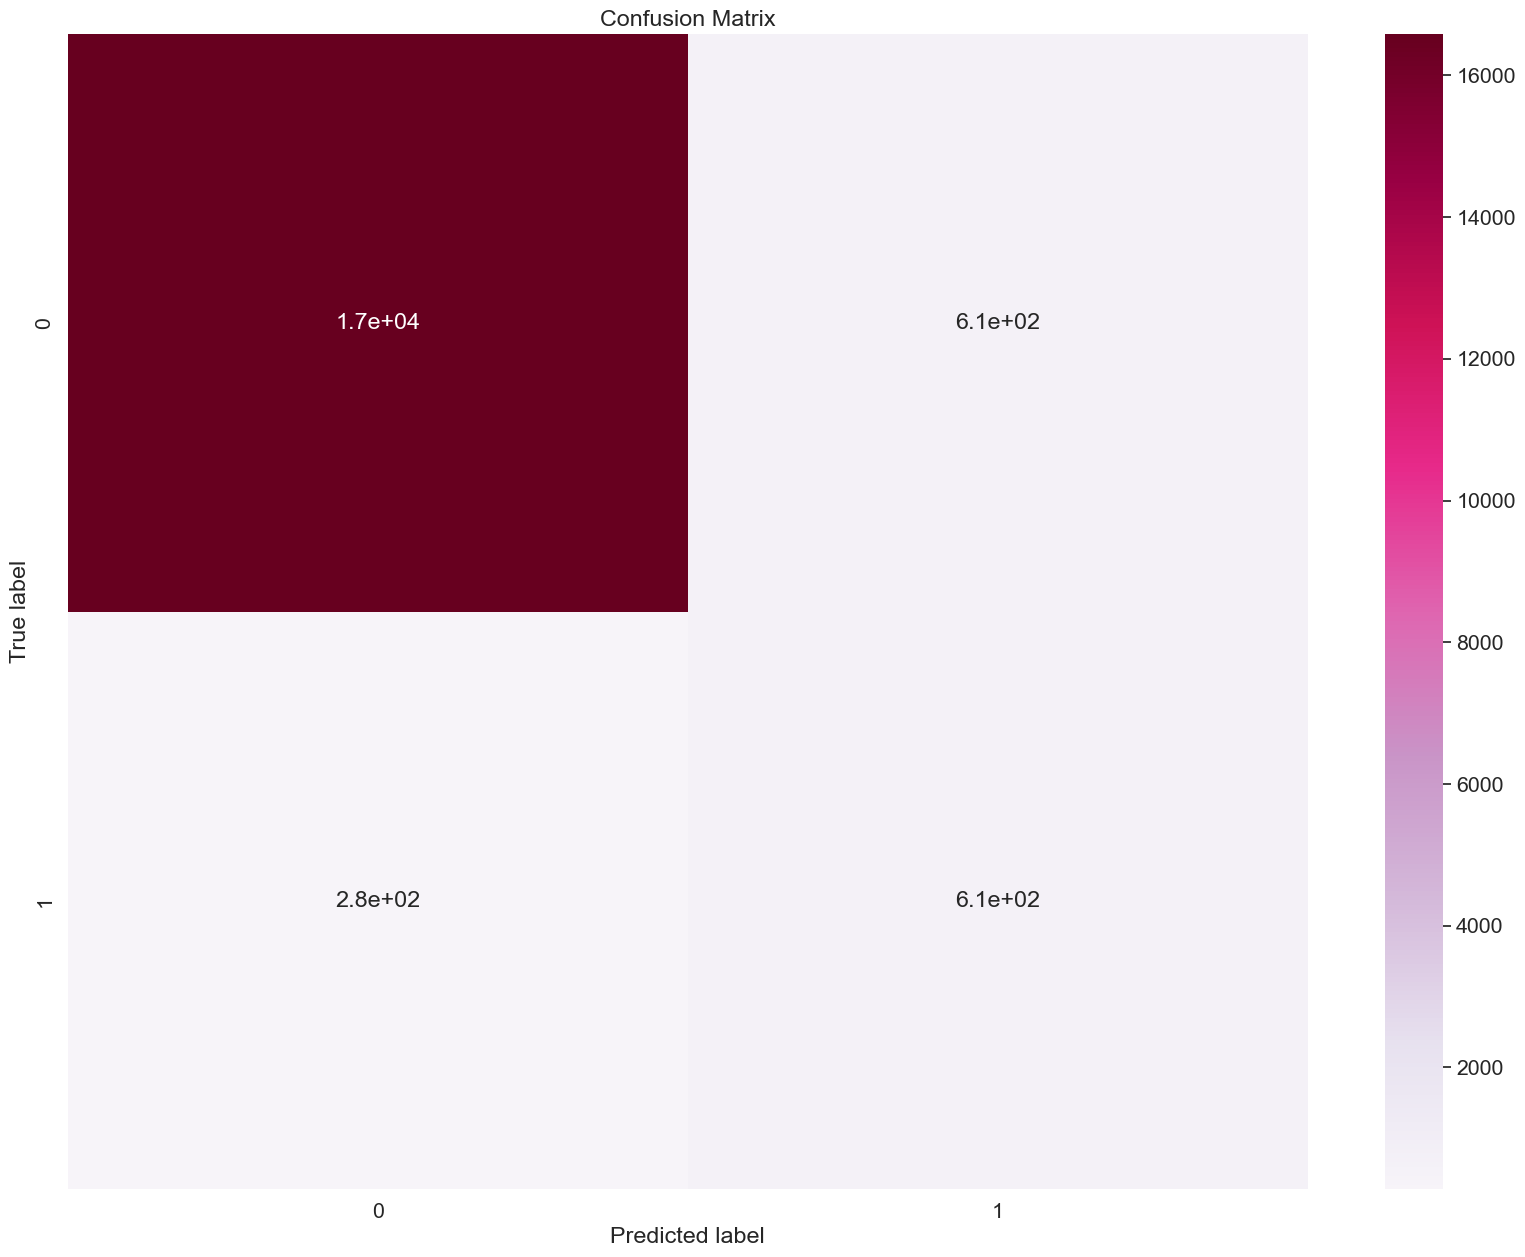

In [52]:
df_cm_bestdtree = plot_confusion(y_test, best_dtree.predict(x_test))

In [116]:
accu = accuracy_score(y_test,best_dtree.predict(x_test))
precis = precision_score(y_test,best_dtree.predict(x_test))
f1_score_tree_2 = f1_score(y_test, best_dtree.predict(x_test))
recall = recall_score(y_test, best_dtree.predict(x_test))
res_arr.append(model_perf(classification_report(y_test, best_dtree.predict(x_test)), "Decision Tree",f1_score_tree_2, accu, precis,recall))

<a id ="4.5"></a>
## 4.5 Gradient Boosting

In [54]:
gbc = GradientBoostingClassifier(n_estimators=100)

In [55]:
##Parameter for grid tunning

# Create the param list
param_list = {'learning_rate': [0.1, 0.05, 0.01],
              'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

In [56]:
gbc_Grid = GridSearchCV(estimator = gbc, param_grid
                       = param_list)

In [57]:
gbc_Grid.fit(x_over, y_over)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [58]:
# Determine the best parameters
print(gbc_Grid.best_params_)
print(gbc_Grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
0.9152467016085307


In [59]:
best_gbc = gbc_Grid.best_estimator_

### Model Evaluation

### Validate with validation dataset 

In [60]:
best_gbc_pred = best_gbc.predict(x_test)

In [61]:
print(classification_report(y_test,best_gbc_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     17186
         1.0       0.49      0.71      0.58       891

    accuracy                           0.95     18077
   macro avg       0.74      0.83      0.78     18077
weighted avg       0.96      0.95      0.95     18077



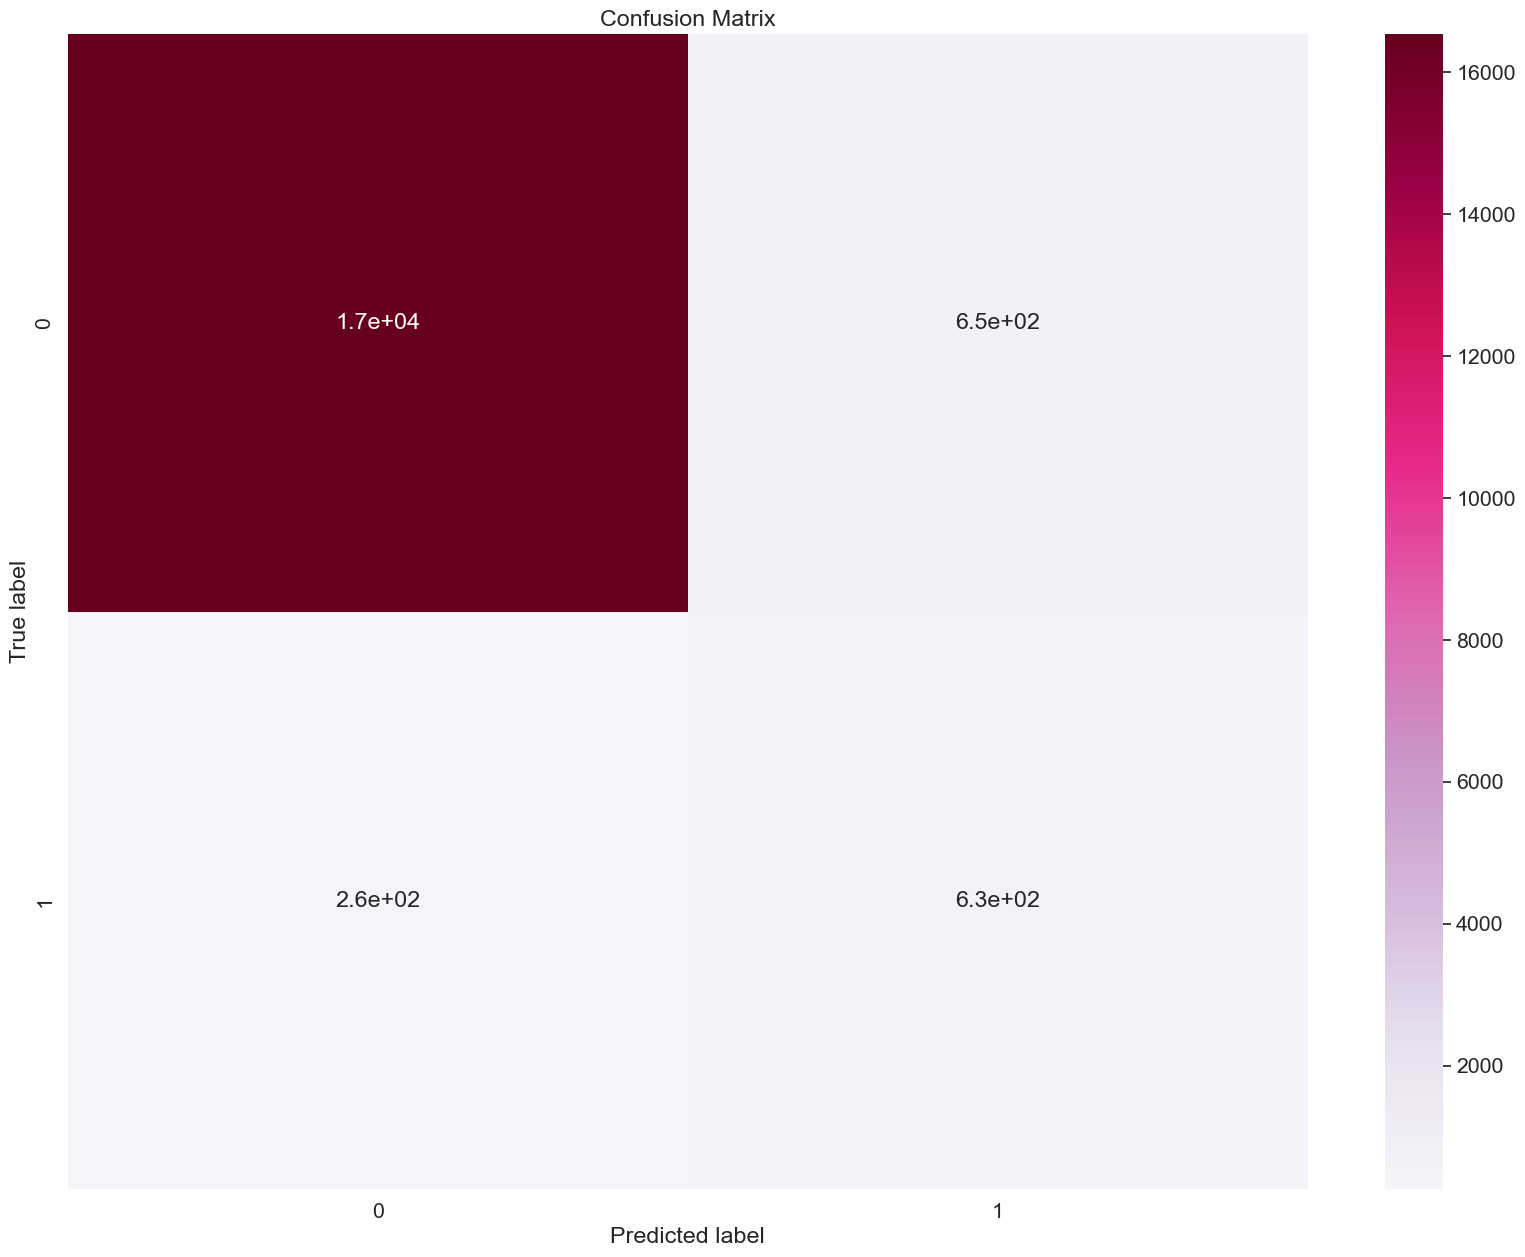

In [62]:
df_cm_best_gbc = plot_confusion(y_test, best_gbc_pred)

In [117]:
# Add the final result to the array list
accu = accuracy_score(y_test,best_gbc_pred)
precis = precision_score(y_test, best_gbc_pred)
recall = recall_score(y_test, best_gbc_pred)
f1_score_best_gbc = f1_score(y_test, best_gbc_pred)
res_arr.append(model_perf(classification_report(y_test, best_gbc_pred),  "Gradient Boosting",f1_score_best_gbc, accu, precis,recall))

<a id ="4.6"></a>
## 4.6 Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42,max_features  ="a") 
# rfc._parameter

In [65]:
##Parameter for grid tunning

# Create the param list
param_list = {'n_estimators': [100,300],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5,10,20],
               'min_samples_split': [2,3,5],
               'min_samples_leaf': [1, 2, 4],
               'criterion': ['gini','entropy']}

In [66]:
rf_Grid = GridSearchCV(estimator = rfc, param_grid
                       = param_list)

In [67]:
rf_Grid.fit(x_over, y_over)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

GridSearchCV(estimator=RandomForestClassifier(max_features='a',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 300]})

In [68]:
# Determine the best parameters
print(rf_Grid.best_params_)
print(rf_Grid.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
0.9126336945857323


In [69]:
best_rfc = rf_Grid.best_estimator_

### Model Evaluation

### Validate with validation dataset 

In [70]:
best_rfc_pred = best_rfc.predict(x_test)

In [71]:
print(classification_report(y_test,best_rfc_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     17186
         1.0       0.54      0.68      0.60       891

    accuracy                           0.96     18077
   macro avg       0.76      0.82      0.79     18077
weighted avg       0.96      0.96      0.96     18077



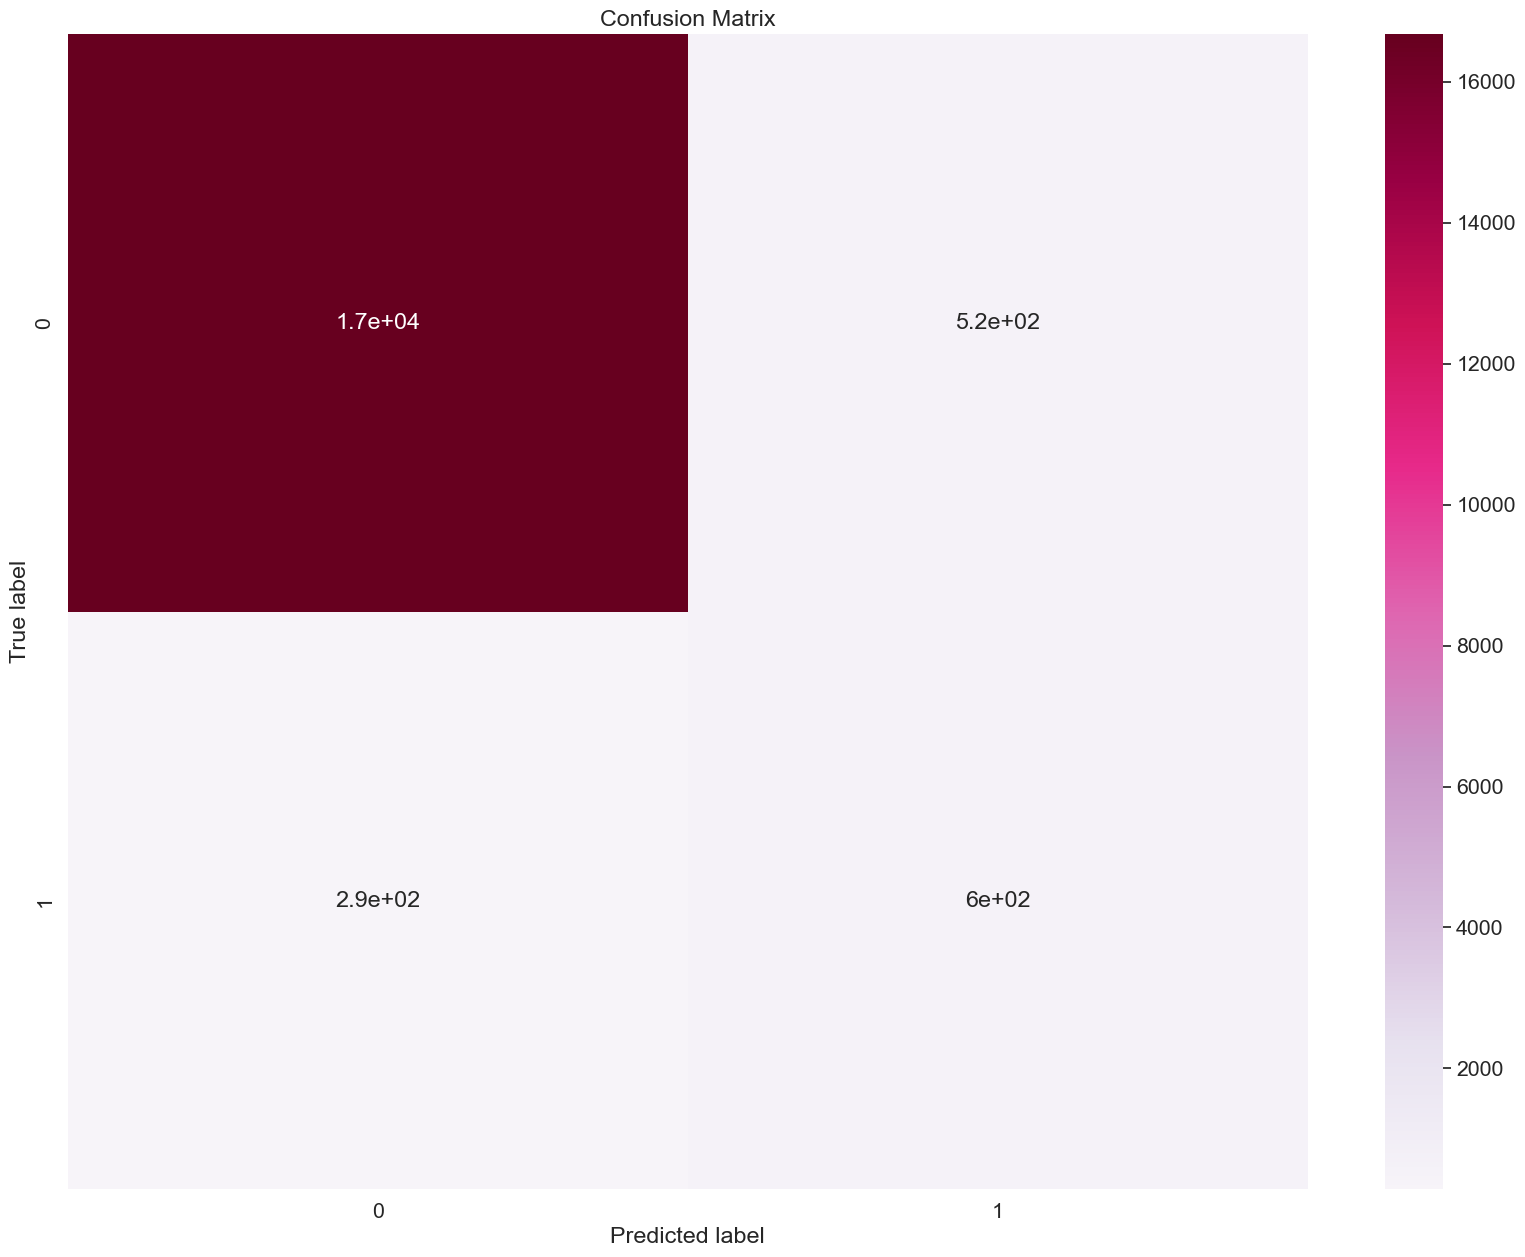

In [72]:
df_cm_best_rfc = plot_confusion(y_test, best_rfc_pred)

In [118]:
# Add the final result to the array list
accu = accuracy_score(y_test,best_rfc_pred)
precis = precision_score(y_test, best_rfc_pred)
recall = recall_score(y_test, best_rfc_pred)
f1_score_best_rfc = f1_score(y_test, best_rfc_pred)
res_arr.append(model_perf(classification_report(y_test, best_rfc_pred), "Random Forest",f1_score_best_rfc, accu, precis, recall))

<a id = "5"></a>
## 5. Ultimate Model Judegment

### Plot chart to compare models

In [119]:
name = []
f1_score_arr = []
precision = []
accuracy = []
recall = []

for item in res_arr:
    name.append(item.name)
    f1_score_arr.append(item.f1)
    accuracy.append(item.accu)
    precision.append(item.precision)
    recall.append(item.recall)
    

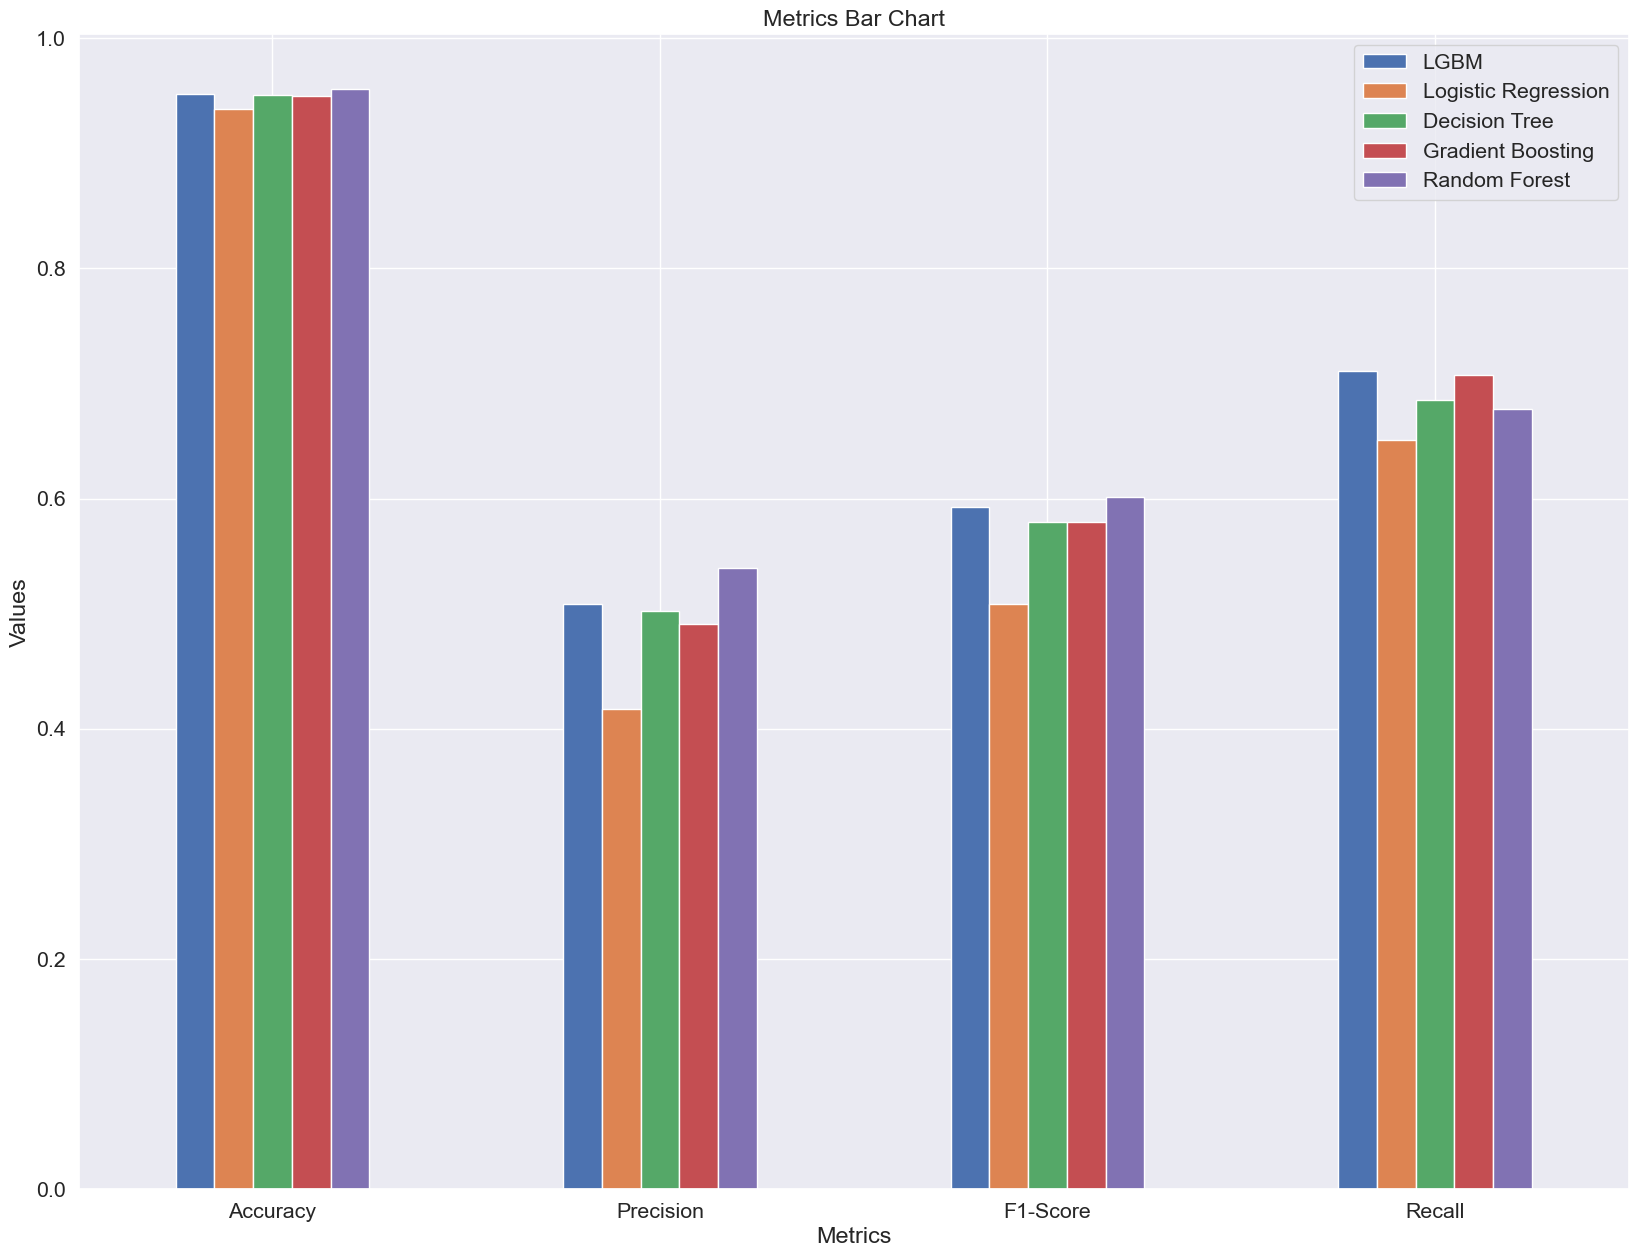

In [122]:
import matplotlib.pyplot as plt

metrics     = ['Accuracy', 'Precision', 'F1-Score', 'Recall']
LGBM       =  [accuracy[0],precision[0],f1_score_arr[0],recall[0]]
LR         = [accuracy[1],precision[1],f1_score_arr[1],recall[1]]
DT         = [accuracy[2],precision[2],f1_score_arr[2],recall[2]]
GB         = [accuracy[3],precision[3],f1_score_arr[3],recall[3]]
RF         = [accuracy[4],precision[4],f1_score_arr[4],recall[4]]


# create the dataframe
chart_df = pd.DataFrame({'LGBM': LGBM, 'Logistic Regression': LR, 'Decision Tree': DT,'Gradient Boosting': GB,'Random Forest': RF}, index=metrics)


# Show the chart
ax = chart_df.plot(kind='bar', xlabel='Metrics', ylabel='Values', title='Metrics Bar Chart')
plt.xticks(rotation=0)
plt.show()

The F1 score provides a single value that combines both precision and recall, giving an overall performance measure of the model since the test data gets imbalanced in diabetes status. As a result, I chose `f1` for the primary metric. On the other hand, `recall` indicates how well the model captures the positive cases and is especially important in situations where correctly identifying all the diabetic cases is crucial, such as in healthcare applications. High recall implies that the model has a low tendency to produce false negatives, i.e., misclassifying individuals with diabetes as non-diabetic.Thus, `recall` will be the followed metric for the comparision in model benchmark performance.

Our final model has optimal `Recall`, and `F1` values.
`LightGBM` is the candidate for this optimal model because it achieves the highest recall (0.70), and f1 score (0.59) compare to others four models.

<a id="6"></a>
## 6. References

*****

[1]	M. Mustafa, “Diabetes prediction dataset.” 08-Apr-2023.
